#    Exploratory Data Analysis of 1000 Movies Dataset

# Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Resolve duplicate movie Title records](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Missing Revenue value resolution](#section404)<br/>
    - 4.5 [Missing Metascore value resolution](#section405)<br/> 
    - 4.5 [Convert clubbed genre to segregated genre categories](#section406)<br/> 
    - 4.7 [Grouping](#section407)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Year vs Movie Produced](#section501)<br/>
    - 5.2 [Year Vs Movie Stats](#section502)<br/>
    - 5.3 [Genre Vs revenue, metascore, rating, votes](#section503)<br/>
    - 5.4 [Relationship between Revenue, Rating,Votes and Metascore of movies](#section504)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [Which movies were hit on the BoxOffice](#section601)<br/>
         - 6.1.1 [Which Movies were Hit with most revenue collected?](#section602)<br/>
         - 6.1.2 [Which Movies were Hit with most votes received from users?](#section603)<br/>
         - 6.1.3 [Which Movies were Hit with most ratings from critics?](#section604)<br/>
     - 6.2 [What runtime interval bring gives hit movie?](#section605)<br/>
         - 6.2.1 [What runtime bin bring higher Revenue?](#section606)<br/>
         - 6.2.2 [Which runtime bin gives higher Rating and votes for a movie](#section607)<br/>
     - 6.3 [How does combination of Genres affects the movie stats?](#section608)<br/>
         - 6.3.1 [Genres Count that brings higher Revenue, Rating and Critical Acclaim for a movie?](#section609)<br/>
         - 6.3.2 [What are the Genre Combinations that bring higher Revenue, Votes for a movie?](#section610)<br/>
         - 6.3.3 [Which segregated Genre gets good movie](#section611)<br/>
- 7. [Conclusion](#section612)<br/>

<a id=section1></a> 
## 1. Problem Statement !

<img src = 'Collages.jpg' width="600" height="600">


<a id=section101></a> 
### 1.1. Introduction

Vision Productions is an upcoming film production company has planned a series of movies in the start of year 2017. Among the pipelined movies, we need to decide on the movies that will get us the highest profit and reputation, for our immerging company.
Thus we need to find characteristics of movies, that could earn us maximum Revenue, Rating and Critical acclaim.
We gathered last 10 year’s movies information from, IMDB (Internet Movie Database) which is a popular online database for movies.
 

<a id=section102></a> 
### 1.2. Data source and dataset

The dataset is taken from the IMDB database. 
It contains data of 1000 most popular movies(by IMDB rating) for the period 2006-2016.

Reference Source: INSAID project guidelines. 
Can be downloaded from the below link: https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv 


#### IMDB Information

__1__. IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

__2__. Users registered on this site are  invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title.

__3__. In our dataset we have also got the information of Metascore movie, which is the rating given by Metacritic, one of the movie company. The ratings are based on registered rating agencies and calculated on a weighted averages.


Apply Exploratory Data Analysis techniques to infer  some insights from the data set of 1000 most popular movies data with details like ratings, revenue and votes received from audiences.

<a id=section2></a> 
### 2. Load the packages and data 

#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling
```                                                  

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

movies = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")  


<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [2]:
movies.dtypes # Display the data type for each variable

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

#### Below is the data dictionary explaining the various columns of the dataset

| Columns | Description     |
|---------|-----------------|
|Rank  | Movie rank order|
| Title   |The title of the film|
|Genre    | A comma-separated list of genres used to classify the film|
|Description|Brief one-sentence movie summary|
|Director   |The name of the film's director|
|Actors     |A comma-separated list of the main stars of the film|
|Year       |The year that the film released as an integer.|
|Runtime (Minutes)|The duration of the film in minutes.|
|Rating|User rating for the movie 0-10|
|Votes|Number of votes|
|Revenue (Millions) | Movie revenue in millions|
|Metascore|An aggregated average of critic scores. Score in 0 - 100.|

<a id=section302></a> 

In [3]:
movies.head()                                                                      # Display the first five rows of the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section303><a/>

In [4]:
movies.describe(include = 'all')                                                    # Descriptive statistics for the numerical variables

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi","Follows Casey and Jonas, two teenagers despera...",Ridley Scott,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


   ### Observations-1

1. Title has one duplicate value as the unique count is 999 but total count is 1000
2. Revenue column has many values missing
3. Metascore column has many values missing

<a id=section304></a> 

In [5]:
movies.sample(10)                      # Display a random 10 rows from the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
481,482,The Giver,"Drama,Romance,Sci-Fi","In a seemingly perfect community, without war,...",Phillip Noyce,"Brenton Thwaites, Jeff Bridges, Meryl Streep, ...",2014,97,6.5,93799,45.09,47.0
290,291,Busanhaeng,"Action,Drama,Horror",While a zombie virus breaks out in South Korea...,Sang-ho Yeon,"Yoo Gong, Soo-an Kim, Yu-mi Jung, Dong-seok Ma",2016,118,7.5,58782,2.13,72.0
182,183,Cinderella,"Drama,Family,Fantasy","When her father unexpectedly passes away, youn...",Kenneth Branagh,"Lily James, Cate Blanchett, Richard Madden,Hel...",2015,105,7.0,117018,201.15,67.0
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
591,592,Adoration,"Drama,Romance",A pair of childhood friends and neighbors fall...,Anne Fontaine,"Naomi Watts, Robin Wright, Xavier Samuel, Jame...",2013,112,6.2,25208,0.32,37.0
870,871,En man som heter Ove,"Comedy,Drama","Ove, an ill-tempered, isolated retiree who spe...",Hannes Holm,"Rolf Lassgård, Bahar Pars, Filip Berg, Ida Eng...",2015,116,7.7,21569,3.36,70.0
942,943,Transpecos,Thriller,For three Border Patrol agents working a remot...,Greg Kwedar,"Johnny Simmons, Gabriel Luna, Clifton Collins ...",2016,86,5.8,1292,NaN,73.0
685,686,The King's Speech,"Biography,Drama",The story of King George VI of the United King...,Tom Hooper,"Colin Firth, Geoffrey Rush, Helena Bonham Cart...",2010,118,8.0,534388,138.80,88.0
344,345,Spider-Man 3,"Action,Adventure",A strange black entity from another world bond...,Sam Raimi,"Tobey Maguire, Kirsten Dunst, Topher Grace, Th...",2007,139,6.2,406219,336.53,59.0
576,577,The Finest Hours,"Action,Drama,History",The Coast Guard makes a daring rescue attempt ...,Craig Gillespie,"Chris Pine, Casey Affleck, Ben Foster, Eric Bana",2016,117,6.8,44425,27.55,58.0


### Observations-2

1. Genre data is with multiple movie catagory clubbed in one string
2. Actors data is with many main Actors clubbed in one text


In [6]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = movies.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing_1000movies.html")


#movies.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})


<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Metascore, Rank, Rating, Revenue, Runtime, Votes and Year</strong> 
 - <em>Categorical</em>: <strong>Actors,Description, Director and Genre</strong>
- <strong>Genre</strong> has 207 distinct values. This shows the variety of moview being created with combinations of genres. 
- <strong>Actors</strong> has mostly distinct values, showing the movies are created with vast different cast clubbed together.
- <strong>Rating</strong> Rating given is between 1 to 10, with average above 6.

 - Missing value Observations
 - <strong>Revenue (Millions)</strong>:  There are 128 missing values. The details of revenue is not available for these movies. 
 - <strong>Metascore</strong>: There are 64 missing values.  Metascore is a weighted average with importance, or weight, to some critics and publications, based on their quality and overall stature. So the missing values may imply that these moview are not reviewed by these critics.


<a id=section307></a> 
### 3.7. Final observations 

- Variables to transform prior to analysis:
    - Standardize all column headers to lower case (to prevent typos!)
    - Resolve duplicate movie Title records
    - Rename 'Revenue (Millions)' and 'Runtime (Minutes)' to something simpler.
    - Split Combination of Genres to multiple columns segregating the genre classifications
    - We will need to decide how to handle Null values for Revenue for 13% of movies.
    
    
    
    
    

<a id=section4></a> 




### 4. Data Normalization

   
- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


<a id=section401></a>
### 4.1. Standardize all column headers to lower case 

In [7]:
'''
1. same lower case for all columns 
2. rename columns with spaces and special chars for easy use
'''

movies.columns = map(str.lower, movies.columns)
movies = movies.rename(columns = {'runtime_(minutes)':'runtime'})
movies = movies.rename(columns = {'revenue_(millions)':'revenue'})
movies.columns

Index(['rank', 'title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime', 'rating', 'votes', 'revenue', 'metascore'],
      dtype='object')

<a id=section402></a>


### 4.2. Resolve duplicate movie Title records

In [8]:
'''
1. We find the records having the same movie
2. If the records are exactly same we will remove one to avoide redundancy of data
3. If the records are not same no chane is required as they are giving different data refrences, though the movie title is same
'''
## find the movie name with count more than one 
movies['title'].value_counts().sort_values(ascending=False)[:3]

The Host                                   2
Night at the Museum: Secret of the Tomb    1
2307: Winter's Dream                       1
Name: title, dtype: int64

In [9]:
''''
Movie  The Host has two records, we will find and observe two records
'''

movies[movies['title']=='The Host']

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


__Duplicate Title Observations__

   Records are refrring to two different movies one released in 2006 and another in 2013. Also noted that the other details like actor,director,revenue is different for two records.
 Hence they are not duplicate records and no action is required. 

   <a id=section403></a>
   
   
   
   ### 4.3. Missing data and its imputation


In [11]:
'''#finding percentage of missing data'''
total = movies.isnull().sum().sort_values(ascending=False)
percent = (movies.isnull().sum()/movies.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head(20)
missing_data


,total,percent
genre_catgory3,340,0.340
revenue,128,0.128
genre_catgory2,105,0.105
metascore,64,0.064
genre_catgory1,0,0.000
genre_catgory,0,0.000
votes,0,0.000
rating,0,0.000
runtime,0,0.000
year,0,0.000


__1__. The percentage of rows with missing values for **revenue** is **12.8%**. This is quite high. So we need to **fill** these missing values.

__2__.  The percentage of rows with missing values for **metascore** is around **6%**. This being not so high, we can **drop** the rows that have missing values for this column.

__3__.  Other missing values are in columns genre_catgory3 and genre_catgory2, this is because few movies have onlye one category of Genre, where has mostof them are with 2 and 3 combinations of genres. This is expected nehaviur, so no need to act on this missing genre_category values.


   <a id=section404></a>
   
   
   
   ### 4.4. Missing Revenue value resolution:


 - Preprofiling output shows the distribution of "revenue" is right skewed. So let's fill these missing values with the median value. 
 - Also the Revenue value is related to the Genres the Movie is made with. 
   So we will take the mean of similar genre movies to fill the null values of revenue. 
   

In [12]:
''' for filling the null revenue values we will consider the mean of movies with similar combination of genres '''
for genre in list(movies['genre'].unique()):
    current_genre = (movies['genre'] == genre)
    median_revenue= movies[current_genre]['revenue'].mean() #.sum()/movies[current_genre]['revenue'].count()
    movies['revenue'][ (movies['genre'] == genre )& (movies['revenue'].isnull())]= median_revenue

    

''' If there are still null values, implies the genre combination is not available 
we can fill the revenue values for such movies with the mean revenue of first genre category of similar movies '''
for genre in list(movies['genre_catgory1'].unique()):
    current_genre = (movies['genre_catgory1'] == genre)
    median_revenue= movies[current_genre]['revenue'].mean() #.sum()/movies[current_genre]['revenue'].count()
    movies['revenue'][ (movies['genre_catgory1'] == genre )& (movies['revenue'].isnull())]= median_revenue
        
    

In [13]:
movies.isnull().sum().sort_values(ascending=False)[:5]

genre_catgory3    340
genre_catgory2    105
metascore          64
genre_catgory1      0
genre_catgory       0
dtype: int64

   <a id=section405></a>
   
   
   
   ### 4.5. Missing Metascore value resolution:


- The percentage of rows that have missing values for "Metascore" is around 6%. 
- This being not so high, we will drop the rows that have missing values for this column.

In [14]:
'''Dropping the rows that having missing values for 'metascore'''
movies.dropna(subset=['metascore'], inplace=True)

'''Check if there are anymore missing values'''
movies.metascore.isnull().any()

False

In [15]:
'''Check the new shape of the dataset'''
movies.shape

(936, 16)

<a id=section406></a>


### 4.6. Convert  clubbed genre to segregated genre categories

In [10]:
'''
split the genre data in different categories to be analysed correctly wrt each genre category
'''

def getGenre(genreStr):
    return genreStr.split(",")

    
movies["genre_catgory"] =movies['genre'].apply(getGenre)
movies["genre_catgory1"]=movies["genre_catgory"].apply(lambda x: x[0] if len(x)>0 else None )
movies["genre_catgory2"]=movies["genre_catgory"].apply(lambda x: x[1] if len(x)>1 else None )
movies["genre_catgory3"]=movies["genre_catgory"].apply(lambda x: x[2] if len(x)>2 else None )



movies.head()

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore,genre_catgory,genre_catgory1,genre_catgory2,genre_catgory3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[Adventure, Mystery, Sci-Fi]",Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[Horror, Thriller]",Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,"[Animation, Comedy, Family]",Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy


<a id=section407></a> 




### 4.7. Grouping




<a id=section4071></a> 

#### 4.7.1 Genre Distribution
Analyse the impacts of segregated genre on revenue,votes and metascore.

In [16]:
''' finding all the available genres in different categories '''
allgenres= pd.concat([movies['genre_catgory1'],movies['genre_catgory2'] ,movies['genre_catgory3']])
allgenres=allgenres.unique()
allgenres=allgenres[allgenres != None]  ## Removing All Null values due to only 1 or 2 combination of category in original genre
allgenres

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy', 'Family', 'History', 'Music', 'Western',
       'War', 'Musical', 'Sport'], dtype=object)

Text(0.5, 1.0, 'Genre Counts distribution')

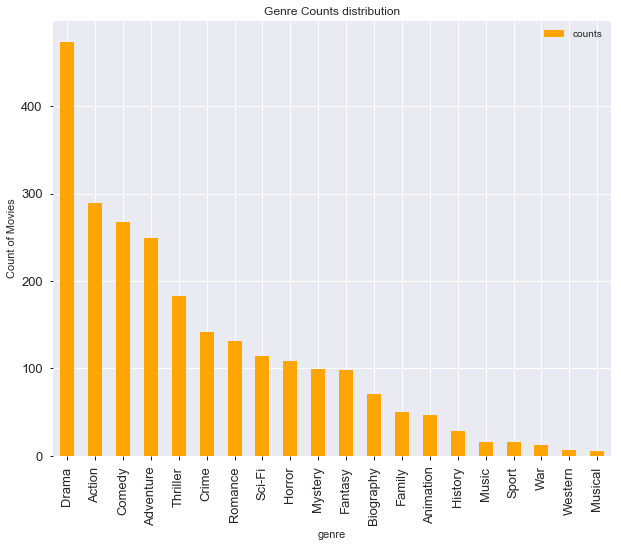

In [17]:
'''
    Getting total movies in each genre types segregated from original combination of genre provided
    For better analysis, put the data in new dataframe 'genall', to keep details wrt to each separate genre
'''

gen1=movies['genre_catgory1'].value_counts().rename_axis('genre').reset_index(name='counts')
gen2=movies['genre_catgory2'].value_counts().rename_axis('genre').reset_index(name='counts')
gen3=movies['genre_catgory3'].value_counts().rename_axis('genre').reset_index(name='counts')
genall=pd.concat([gen1,gen2,gen3],ignore_index=True)
genall=genall.groupby('genre')['counts'].sum().rename_axis('genre').reset_index(name='counts')


'''
    plotting the genre and movie count made with those genre 
'''
genall.sort_values(by='counts',ascending=False).plot(x = 'genre', y='counts',kind='bar', figsize=(10,8), fontsize=13, color='orange')
plt.ylabel('Count of Movies')
plt.title('Genre Counts distribution')

Text(0.5, 1.0, 'Bottom 10 [ Genre and Movie Counts]')

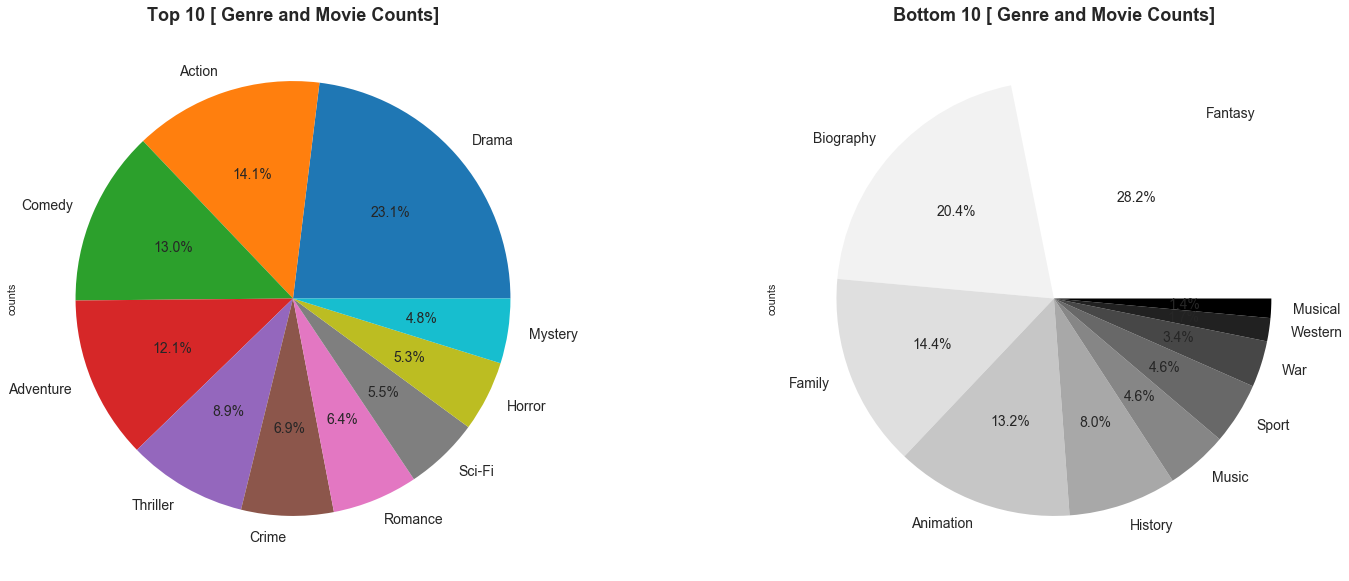

In [18]:
''' 
    1. plotting the top 10 most produced movie genre
    2. plotting the bottom 10 least produced movie genre

'''

f,ax = plt.subplots(1,2,figsize=(25,10))

genall.sort_values(by='counts', ascending=False).head(10).plot.pie(y='counts',legend = False,
                                                                         labels=genall.sort_values(by='counts', ascending=False).head(10)['genre'],
                                                                         autopct='%1.1f%%',ax=ax[0],fontsize=14)
genall.sort_values(by='counts', ascending=False).tail(10).plot.pie(y='counts',legend = False,
                                                                           labels=genall.sort_values(by='counts', ascending=False).tail(10)['genre'],
                                                                       autopct='%1.1f%%',ax=ax[1],fontsize=14 , cmap='Greys')
ax[0].set_title('Top 10 [ Genre and Movie Counts]',fontsize=18,weight='bold')
ax[1].set_title('Bottom 10 [ Genre and Movie Counts]',fontsize=18,weight='bold')



<a id=section4072></a> 
#### 4.7.2 Genre distribution of the sample

We can see the trend of total movies made in each type of genre in each year. 


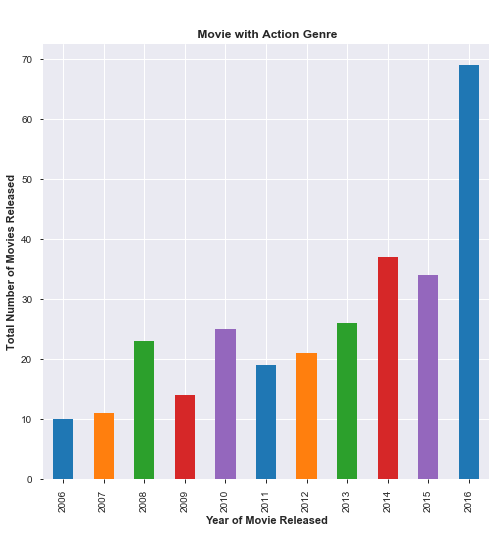

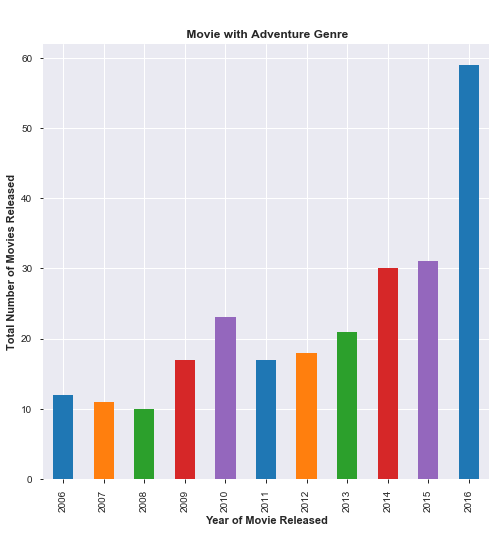

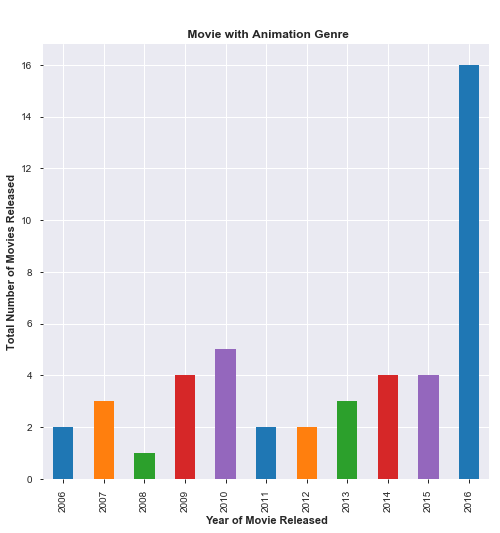

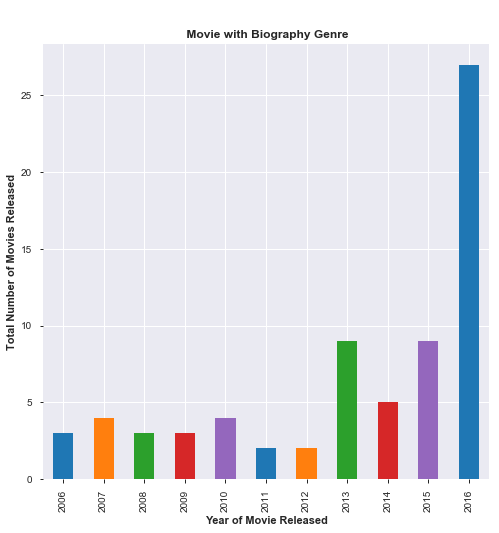

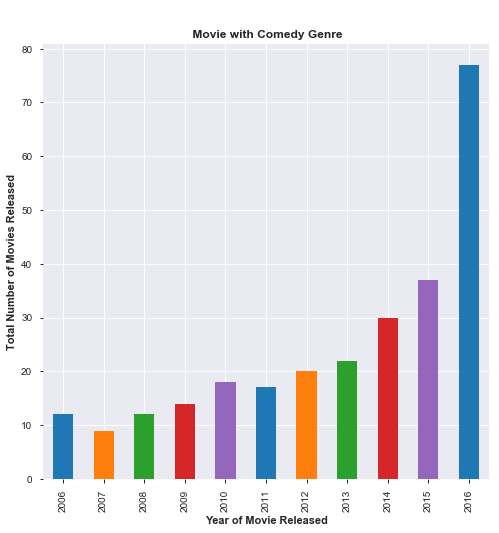

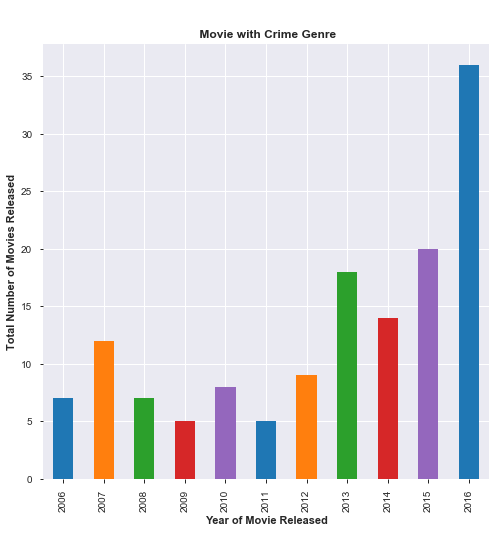

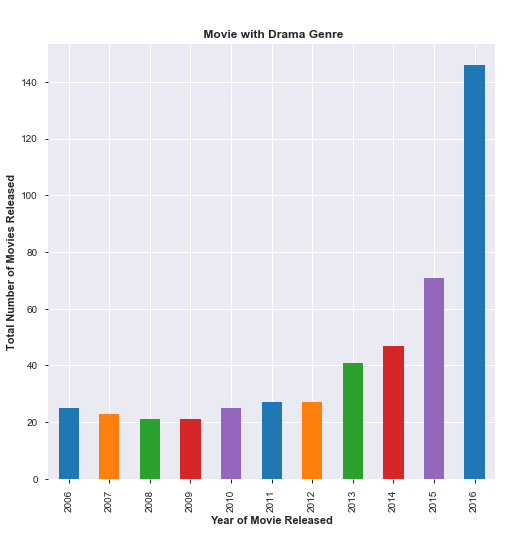

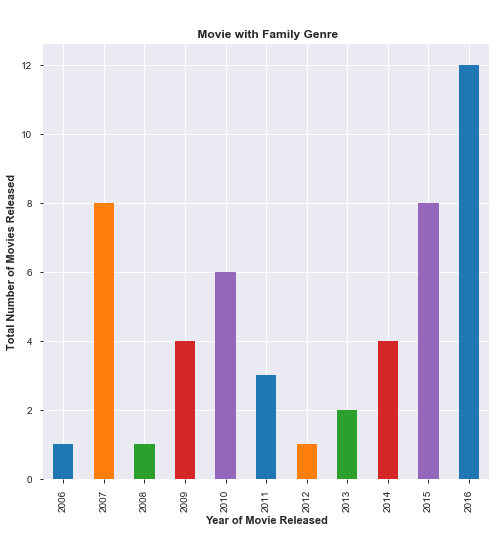

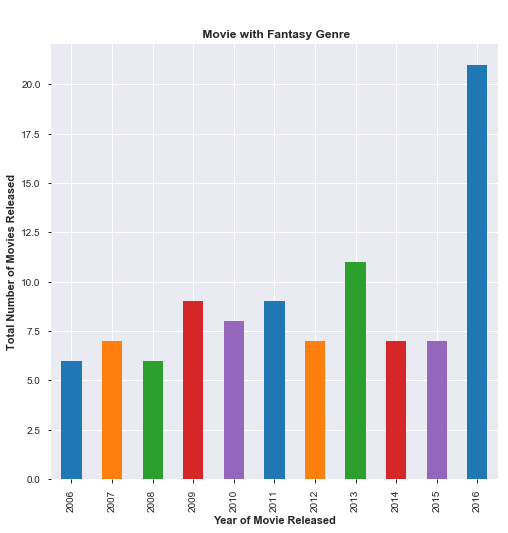

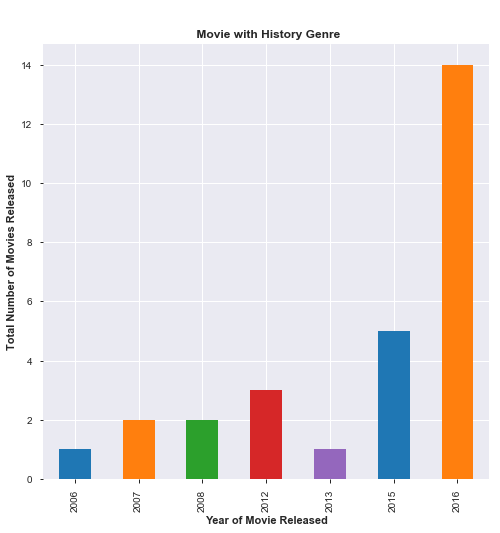

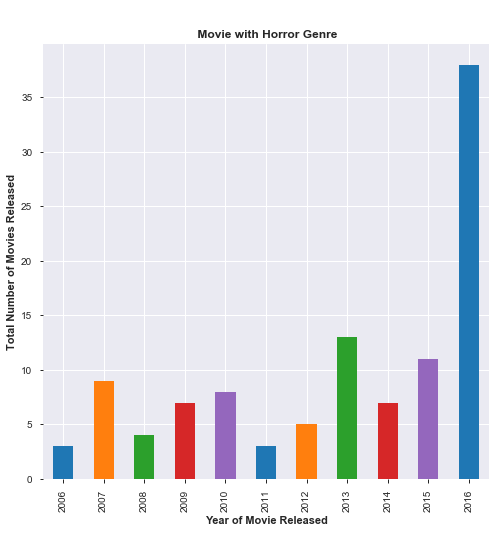

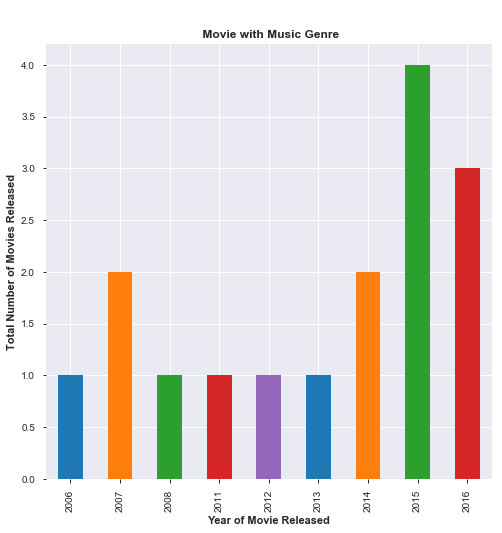

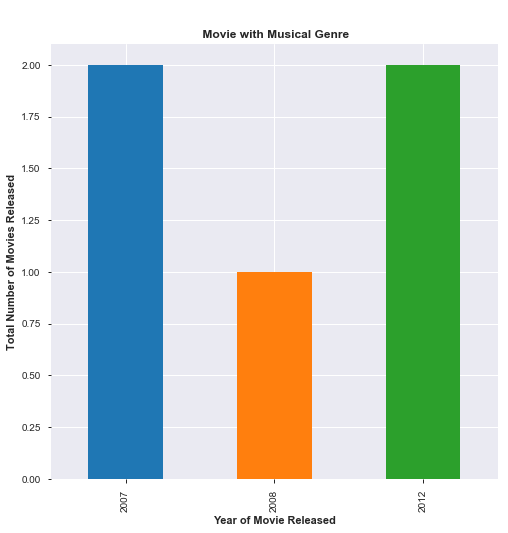

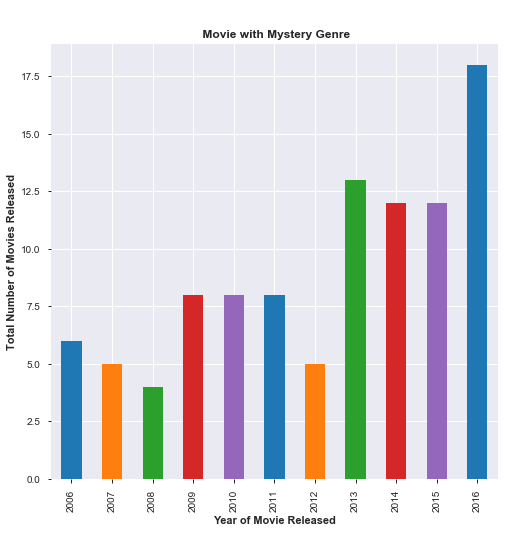

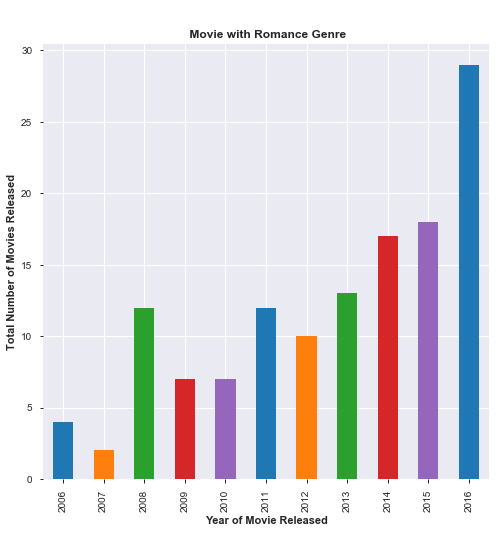

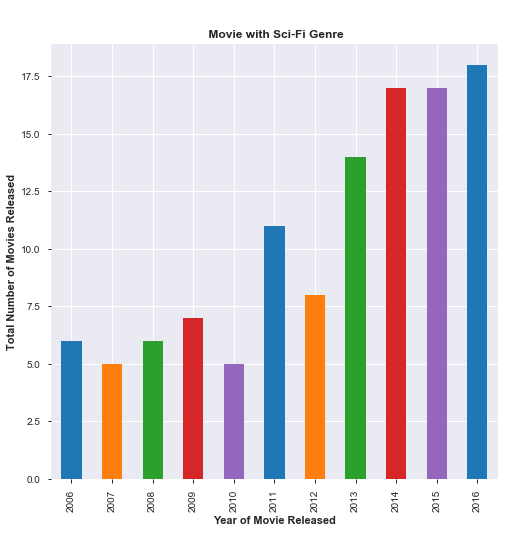

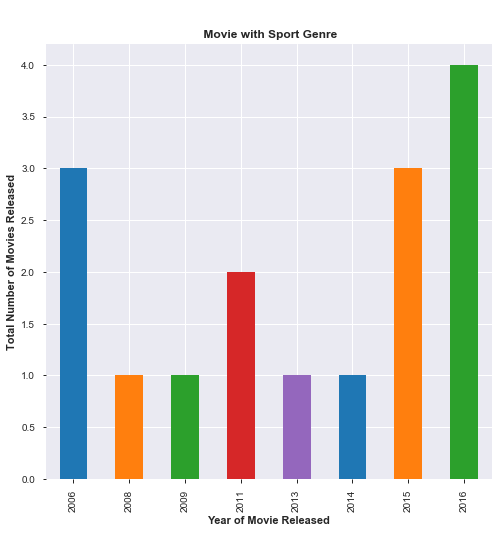

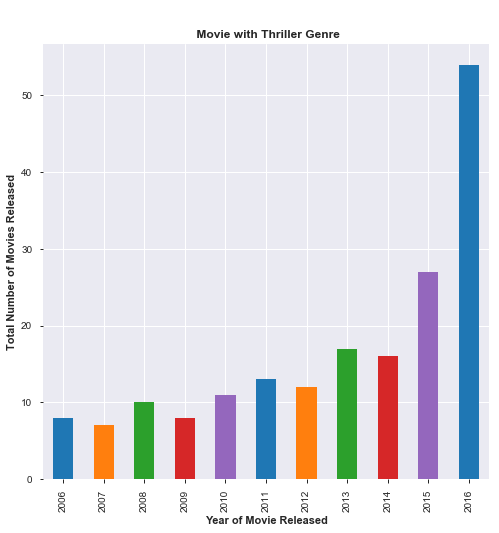

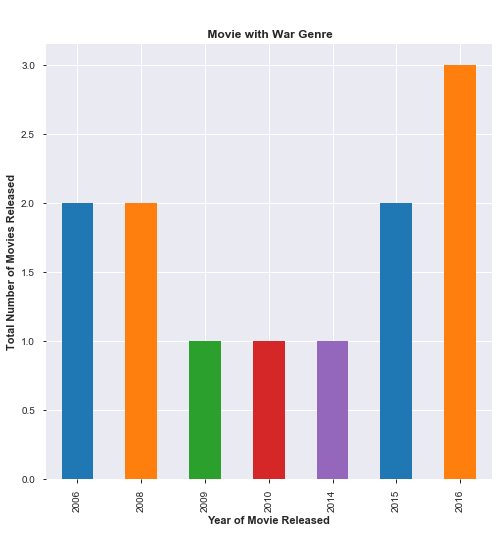

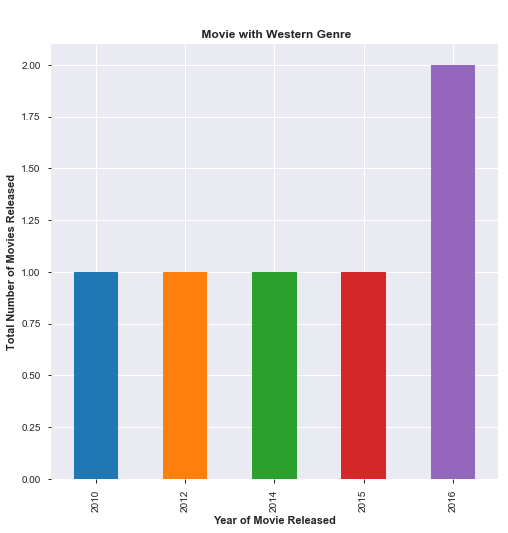

In [19]:
#print('Number of movies in each genre: \n')
movieCount = np.zeros(len(list(genall['genre'])))
i = 0
for genre in list(genall['genre']):
    current_genre = (movies['genre_catgory1'] == genre) | (movies['genre_catgory2'] == genre) | (movies['genre_catgory3'] == genre)
    plt.figure()
    plt.xlabel('Year of Movie Released', weight='bold')
    plt.ylabel('Total Number of Movies Released', weight='bold')
    plt.title("\n\n Movie with "+str(genre)+" Genre" , weight='bold')
    movies[current_genre].year.value_counts().sort_index().plot.bar(colormap='plasma',figsize=(8,8),color = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'));
   # print(genre, len(movies[current_genre]))
   #movieCount[i] = len(movies[current_genre])
    #i += 1

<a id=section4073></a> 


#### 4.7.3 Dealing with Categorical Variables

In [21]:
from sklearn.preprocessing import LabelEncoder  # Label encoder is used to transform non-numerical labels to numerical labels.

movies_new = movies.copy(deep=True)       # creating new dataframe to make any datatype changes over it and keep the original dataframe as it is..

number = LabelEncoder()              # Here as our data set consists only of categorical values except ratings,votes,metascore,revenue
for i in movies_new.columns:         # in order to find the correlation between variables, we do Label encoding 
    movies_new[i] = number.fit_transform(movies_new[i].astype('str'))
    


#### Correlation of Features

In [22]:
corr_rank=movies_new.corr()['rank']
corr_rank[np.argsort(corr_rank,axis=0)[::-1]]

rank              1.000000
genre_catgory1    0.132631
genre             0.130234
genre_catgory     0.129806
genre_catgory2    0.089921
actors            0.089343
runtime           0.082437
revenue           0.041712
director          0.038894
genre_catgory3    0.022977
title             0.018543
description      -0.026786
votes            -0.050980
metascore        -0.158956
rating           -0.171062
year             -0.173562
Name: rank, dtype: float64

Text(0.5, 1.0, 'Coorelation b/w diff. features')

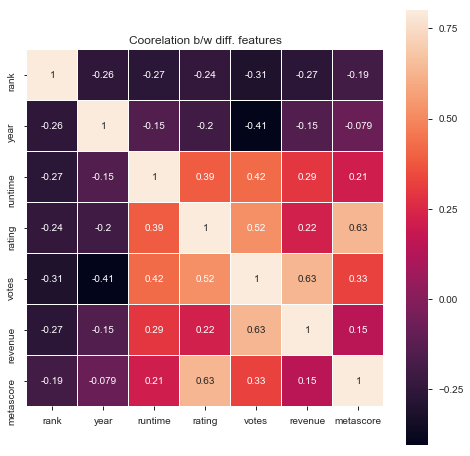

In [23]:
corr = movies.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True)
plt.title('Coorelation b/w diff. features')

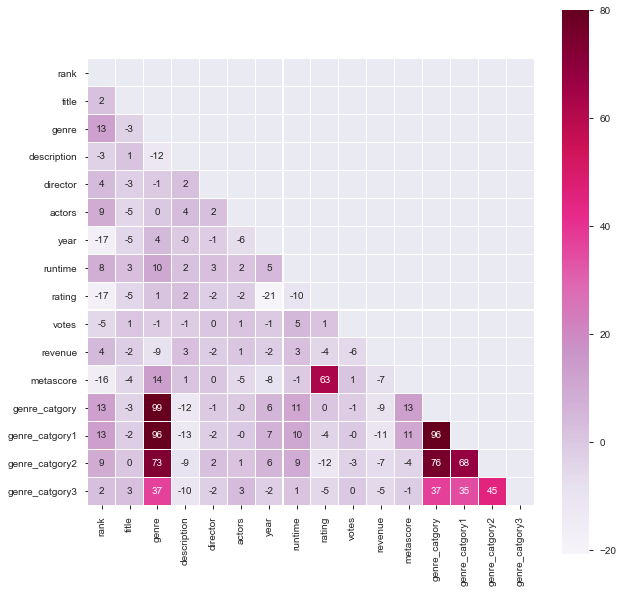

In [24]:
'''features_correlation = movies_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='PuRd')
plt.show()
'''

## calculating correlations between genres
features_correlation = movies_new.corr()

# creating mask to plot only lower triangle of the heatmap
mask = np.zeros_like(features_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plotting the heatmap
plt.figure(figsize=(10,10))
g = sns.heatmap(features_correlation*100, fmt='.0f', mask= mask, square=True,
                cbar=True, cmap='PuRd',linewidth=.01,annot=True,
                vmax=80);

# saving the heatmap
#g.figure.savefig('genre_correlation.png')

#### Observations

- __rating__ and __metascore__ are highly corelated.
- The remaining factors have very weak corelation.
- Also noted that the revenue and rating have no corelation.

<a id=section5><a/>

In [9]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = movies.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing_1000movies.html")


#movies.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})


## 5. Identify patterns in the data

<a id=section501></a> 

### 5.1. Year vs Movie Produced

Text(0.5, 0, "Movie's Released Year")

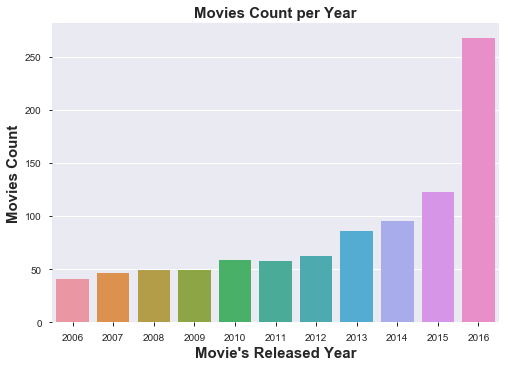

In [25]:
movies.groupby('year')['rank'].count()


ax= sns.countplot(x='year', data=movies)
ax.set_title('Movies Count per Year',fontsize=15, weight='bold')
ax.set_ylabel('Movies Count',fontsize=15, weight='bold')
ax.set_xlabel('Movie\'s Released Year',fontsize=15, weight='bold')


### Observations

__1__. It is observed that barring 2011 and 2012, there has been a constant uptrend in the number of movies produced in subsequent years.

__2__. There is a significant increase in the number of movies released(count=297) in 2016, when compared to the number of movies released(count=127) in 2015.

  

<a id=section502></a> 

### 5.2. Year Vs Movie Stats

In this analysis we will find how the movie statistics like revenue,metascore,rating and votes has been impacted over the year.
1. We will see the total of each Movie Stats variable in each year
2. We will see the average of each Stats variable in each year

Text(1.0, 1.0, 'Year wise TOTAL of Revenue,Rating,Metascore,Votes                                                              \n\n')

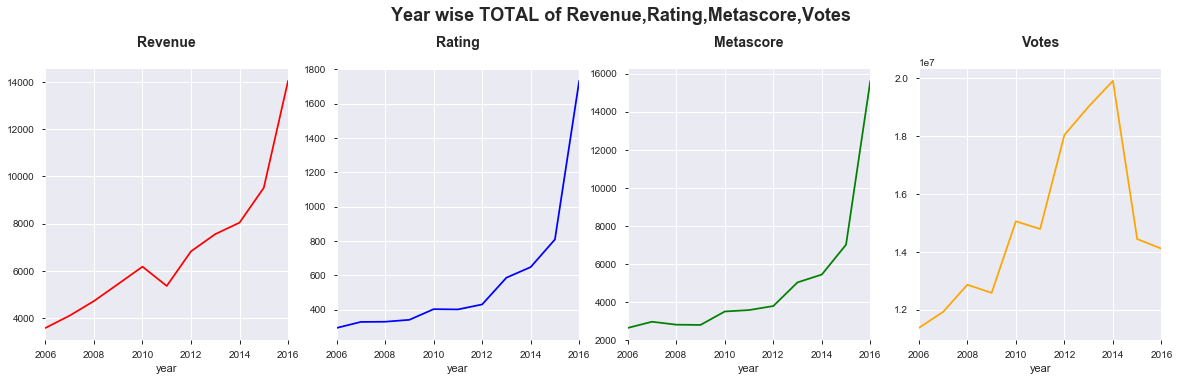

In [88]:

f,ax = plt.subplots(1,4,figsize=(20,5))
movies.groupby('year')['revenue'].sum().plot(ax=ax[0],color='r')
movies.groupby('year')['rating'].sum().plot(ax=ax[1],color='b')
movies.groupby('year')['metascore'].sum().plot(ax=ax[2],color='g')
movies.groupby('year')['votes'].sum().plot(ax=ax[3],color='orange')

ax[0].set_title('\nRevenue\n',fontsize=14,fontweight="bold")
ax[1].set_title('\nRating\n',fontsize=14,fontweight="bold")
ax[2].set_title('\nMetascore\n',fontsize=14,fontweight="bold")
ax[3].set_title('\nVotes\n',fontsize=14,fontweight="bold")
plt.title('Year wise TOTAL of Revenue,Rating,Metascore,Votes                                                              \n\n'
          ,fontsize=18,fontweight="bold",loc='right')


Text(1.0, 1.0, 'Year wise AVERAGE of Revenue,Rating,Metascore,Votes                                                              \n\n')

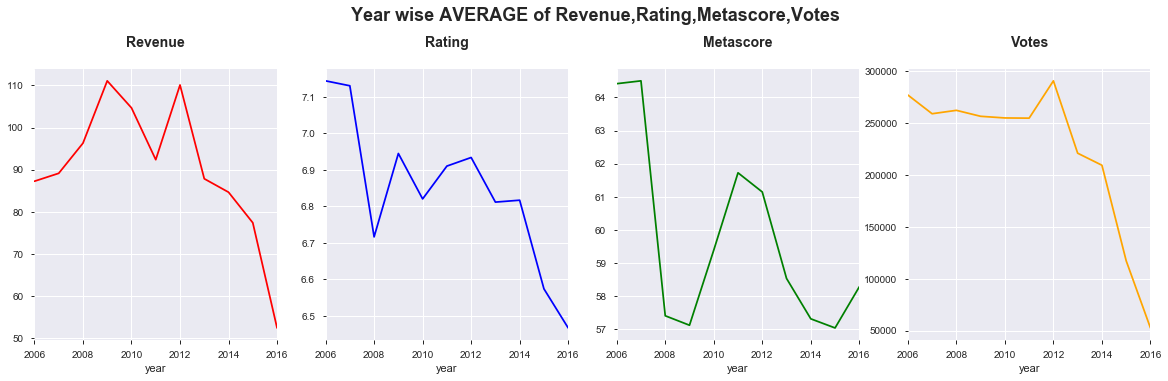

In [89]:

#sns.swarmplot(x="year", y="votes",data=movies,size=4,palette="Set1")
f,ax = plt.subplots(1,4,figsize=(20,5))
movies.groupby('year')['revenue'].mean().plot(ax=ax[0],color='r')
movies.groupby('year')['rating'].mean().plot(ax=ax[1],color='b')
movies.groupby('year')['metascore'].mean().plot(ax=ax[2],color='g')
movies.groupby('year')['votes'].mean().plot(ax=ax[3],color='orange')

ax[0].set_title('\nRevenue\n',fontsize=14,fontweight="bold")
ax[1].set_title('\nRating\n',fontsize=14,fontweight="bold")
ax[2].set_title('\nMetascore\n',fontsize=14,fontweight="bold")
ax[3].set_title('\nVotes\n',fontsize=14,fontweight="bold")
plt.title('Year wise AVERAGE of Revenue,Rating,Metascore,Votes                                                              \n\n'
          ,fontsize=18,fontweight="bold",loc='right')


### Observations

__1__. Upward trend in the total Revenue from movies. Significant increase in the revenue from movies in 2016. Total Revenue collected is in correlation with the increase in the number of movies released in 2016.

__2__. There is a decreasing trend in the average Revenue,Rating and Votes. Since with huge number of movies the competition is increasing. Also total revenue,votes has got distributed among many movies in year 2016 as per the likeness of viewers.

__3__. Aggregate Metascore,Ratings are seen increased in the year 2016. This is due to the significant increase in the production of movies in year 2016. Despite big increase in movies released in 2016, the votes received has not increased 
much.


<a id=section503></a> 


### 5.3. Genre Vs revenue, metascore, rating, votes

.

We can create a sub-dataset **genall**, that gives the clear picture for the analysis of genre wrt to total_count,evenue_share,score_share,ratings_share,votes_share.

In [32]:
'''#creating the genall structure '''

#genall.drop(['revenue_share','score_share'], axis= 1 , inplace=True)
rev=pd.DataFrame(data = np.zeros(len(list(genall['genre']))),columns=['revenue_share'])
score=pd.DataFrame(data = np.zeros(len(list(genall['genre']))),columns=['score_share'])
ratings_share=pd.DataFrame(data = np.zeros(len(list(genall['genre']))),columns=['ratings_share'])
votes_share=pd.DataFrame(data = np.zeros(len(list(genall['genre']))),columns=['votes_share'])
genall=pd.concat([genall,rev,score,ratings_share,votes_share],axis=1)

genall.head() ## lets see the datastructure created

,genre,counts,revenue_share,score_share,ratings_share,votes_share
0,Action,289,0.0,0.0,0.0,0.0
1,Adventure,249,0.0,0.0,0.0,0.0
2,Animation,46,0.0,0.0,0.0,0.0
3,Biography,71,0.0,0.0,0.0,0.0
4,Comedy,268,0.0,0.0,0.0,0.0


In [33]:
'''#Filling the share percentages'''

total_revenue=movies['revenue'].sum()
total_metascore=movies['metascore'].sum()

total_rating=movies['rating'].sum()
total_votes=movies['votes'].sum()

for genre in list(genall['genre']):
    current_genre = (movies['genre_catgory1'] == genre) | (movies['genre_catgory2'] == genre) | (movies['genre_catgory3'] == genre)
    
    genall['revenue_share'][genall['genre'] == genre] = ( movies[current_genre].xs('revenue', axis=1).sum()/total_revenue ) * 100    
    genall['score_share']  [genall['genre'] == genre] = ( movies[current_genre].xs('metascore', axis=1).sum()/total_metascore ) * 100

    genall['ratings_share'][genall['genre'] == genre] = ( movies[current_genre].xs('rating', axis=1).sum()/total_rating)*100
    genall['votes_share']  [genall['genre'] == genre] = ( movies[current_genre].xs('votes', axis=1).sum()/total_votes)*100

    
genall ## lets see the percentage values populated 


,genre,counts,revenue_share,score_share,ratings_share,votes_share
0,Action,289,47.993702,28.177866,30.300865,42.560611
1,Adventure,249,51.536630,26.009781,26.763515,39.719390
2,Animation,46,11.740015,5.897482,5.356831,5.706942
3,Biography,71,5.577048,8.866147,8.228943,7.159050
4,Comedy,268,26.727096,27.962326,28.321029,23.905968
5,Crime,141,11.486664,14.758196,15.211558,15.829892
6,Drama,474,31.212963,54.515486,52.390252,43.727979
7,Family,50,8.103765,5.037131,5.279035,4.095247
8,Fantasy,98,16.878727,9.788082,10.232595,13.159477
9,History,28,1.950492,3.593552,3.162658,2.512639


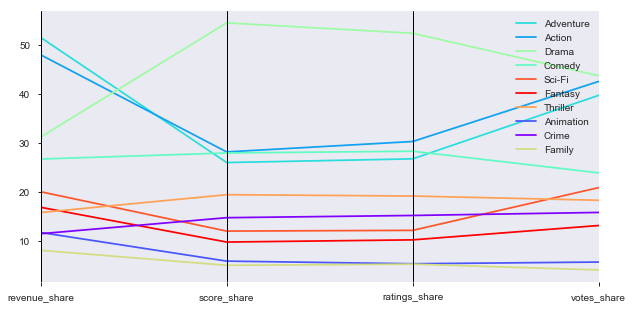

In [34]:
# Using pandas parallel_coordinates to plot the Parallel Coordinates betwen 'Revenue', 'Profits', 'Selling Price', 

from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,5))
parallel_coordinates(genall.sort_values(by='revenue_share', ascending=False).head(10), 
                     class_column='genre', colormap='rainbow', sort_labels=True, 
                     cols=['revenue_share', 'score_share', 'ratings_share', 'votes_share'])

Text(0.5, 1.0, 'All Genre vs Revenue_Share distribution')

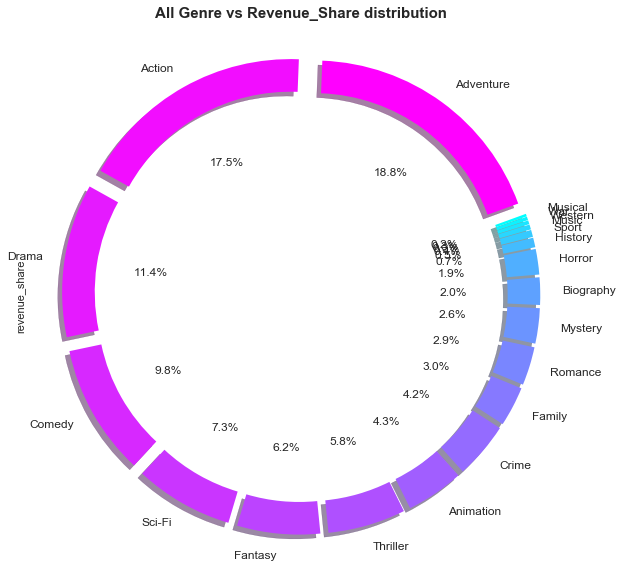

In [35]:
genall.sort_values(by='revenue_share', ascending=False)['revenue_share'].plot(kind='pie',
                            labels=genall.sort_values(by='revenue_share', ascending=False)['genre'],
                            autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                            explode=np.ones(20)/10, figsize=(10, 10), fontsize=12, 
                            startangle=20, shadow=True, cmap='cool_r')

plt.title('All Genre vs Revenue_Share distribution',fontsize=15, weight='bold')
                             

### Observations
__1__. There are **multiple genres** mapped with each movie, we segregated the the category in different series to analyse the impact of each individual genre on movie stats.

__2__. Clearly **Adventure** and **Action** movies are having a good market at the box office. Followed by Drama, Comedy and Sci-Fi movies. But number of movies made in Drama genre are maximum also the metascore and ratings for them are highest, as seen in section (4.4.1).

__3__. The least profit movies are with genres are **Musical, Western and War**. As the number of movies made in these genres are less about < 10, so obviously their collections was also low.



<a id=section504></a> 
### 5.4. Relationship between Revenue, Rating,Votes and Metascore of movies

.

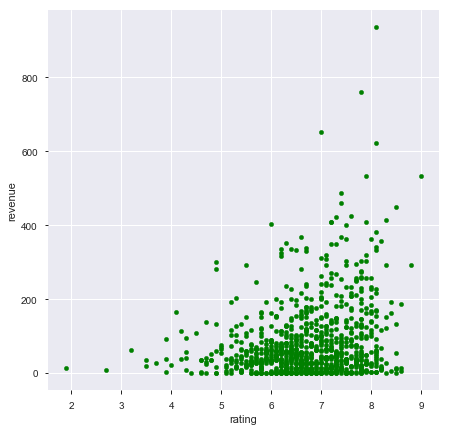

In [36]:
movies.plot.scatter(x='rating', y = 'revenue',figsize=(7,7),color='g')


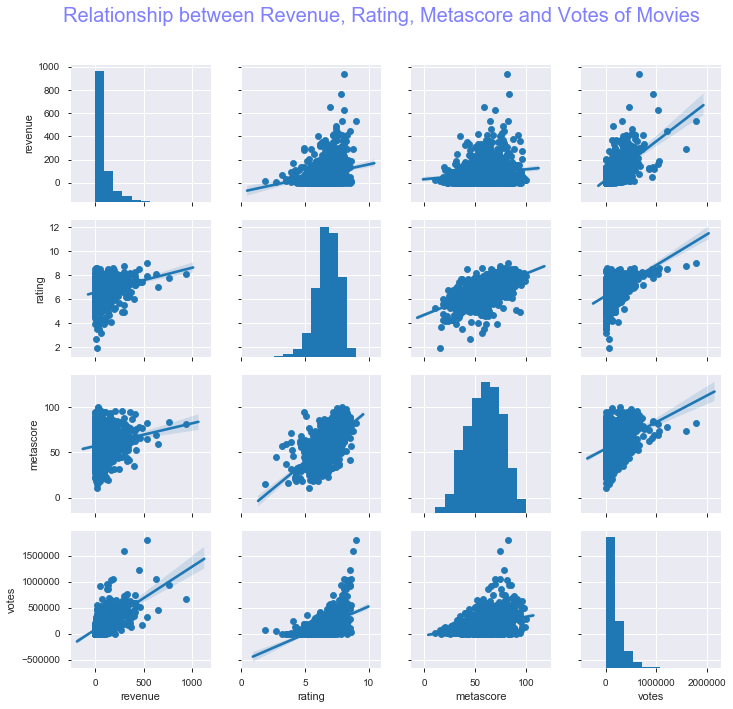

In [37]:
a=sns.pairplot(movies, palette="muted",height=2.5,vars=['revenue', 'rating', 'metascore','votes'],
               kind='reg');

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Revenue, Rating, Metascore and Votes of Movies',fontsize=20,color='b',alpha=0.5);

### Observations

__1__. Rating and Metascore have strong correlation. So it means the users on IMDB and Critics on Metacritic have similar reviews for most of the movies.

__2__. It was observed that Revenue  Metascore, Votes, all have a positive correlation with Rating. As the Rating increases, the Revenue, Runtime and Votes also increases.



<a id=section506></a> 

### 5.6. Impact of Directors on Movies
.

Text(0.5, 1.0, 'Movies Count for each Runtime level')

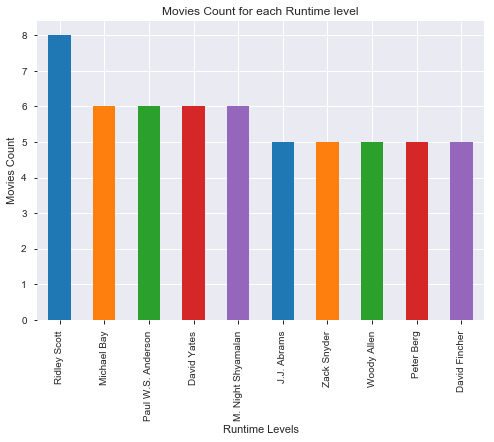

In [44]:
# print(movies.director.value_counts())
ax=movies.director.value_counts()[:10].plot.bar(color = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'));
ax.set_ylabel('Movies Count');
ax.set_xlabel('Runtime Levels')
ax.set_xticklabels(movies.director.value_counts()[:10].index, rotation = 90);
ax.set_title('Movies Count for each Runtime level')

<a id=section6></a>
# 6. Analysis through questions

<a id=section601></a>
.

## 6.1.  Which movies were hit on the BoxOffice ?


<a id=section602></a>
### 6.1.1. Which Movies were Hit with most revenue collected?

In [49]:
movies.sort_values(by='revenue', ascending=False).head(5)[['title','director', 'revenue', 'rating', 'genre_catgory1','year']]

,title,director,revenue,rating,genre_catgory1,year
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936.63,8.1,Action,2015
87,Avatar,James Cameron,760.51,7.8,Action,2009
85,Jurassic World,Colin Trevorrow,652.18,7.0,Action,2015
76,The Avengers,Joss Whedon,623.28,8.1,Action,2012
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action,2008


<a id=section603></a>
### 6.1.2. Which Movies were Hit with most votes received from users?

In [50]:
movies.sort_values(by='votes', ascending=False).head(5)[['title','director', 'revenue', 'rating', 'genre_catgory1','year']]

,title,director,revenue,rating,genre_catgory1,year
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action,2008
80,Inception,Christopher Nolan,292.57,8.8,Action,2010
124,The Dark Knight Rises,Christopher Nolan,448.13,8.5,Action,2012
36,Interstellar,Christopher Nolan,187.99,8.6,Adventure,2014
76,The Avengers,Joss Whedon,623.28,8.1,Action,2012


<a id=section604></a>
### 6.1.3. Which Movies were Hit with most ratings from critics?

In [51]:
movies.sort_values(by='rating', ascending=False).head(5)[['title','director', 'revenue', 'rating', 'genre_catgory1','year']]

,title,director,revenue,rating,genre_catgory1,year
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action,2008
80,Inception,Christopher Nolan,292.57,8.8,Action,2010
36,Interstellar,Christopher Nolan,187.99,8.6,Adventure,2014
249,The Intouchables,Olivier Nakache,13.18,8.6,Biography,2011
96,Kimi no na wa,Makoto Shinkai,4.68,8.6,Animation,2016


<a id=section605></a>
## 6.2. What runtime interval bring higher Revenue, higher Rating and higher votes for a movie?

year
2006    119.170732
2007    120.956522
2008    111.367347
2009    116.367347
2010    111.322034
2011    115.568966
2012    118.467742
2013    115.813953
2014    114.673684
2015    114.048780
2016    107.895522
Name: runtime, dtype: float64


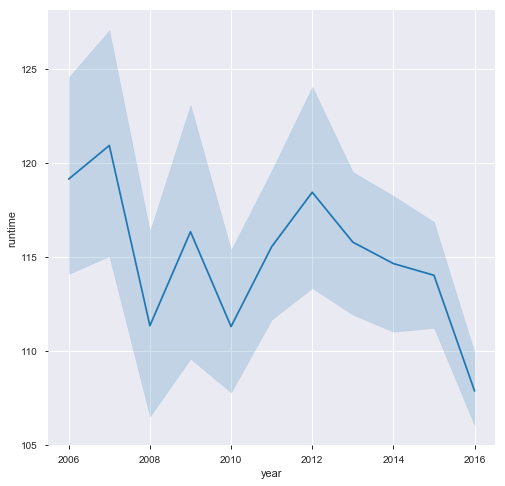

In [38]:
#movies.sort_values(by='rating', ascending=False).plot.scatter(x='runtime', y='rating',color='g')
print(movies.groupby('year')['runtime'].mean())
#movies.groupby((by='rating', ascending=False)
plt.figure(figsize=(8,8))
sns.lineplot(data=movies, x='year', y='runtime')


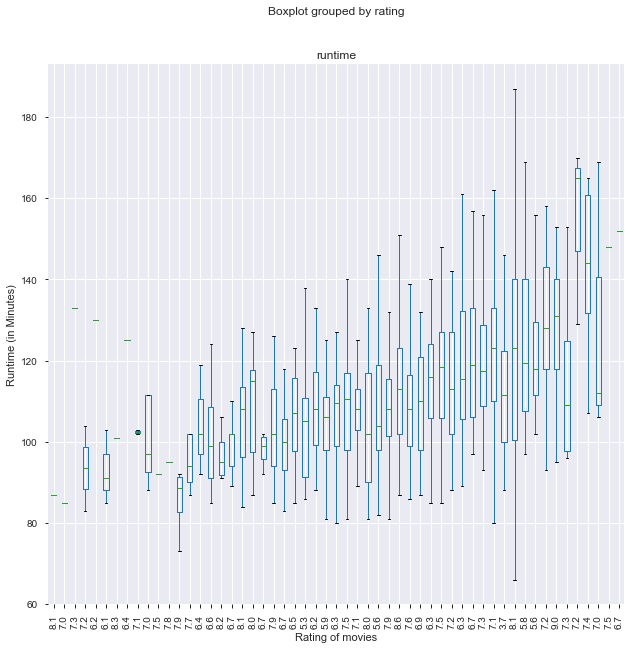

In [39]:
# use a visualization to detect whether there is a relationship between Runtime and Rating
ax = movies.boxplot(column='runtime', by='rating',figsize=(10,10));
ax.set_ylabel('Runtime (in Minutes)');
ax.set_xlabel('Rating of movies')
ax.set_xticklabels(movies.rating, rotation = 90);

#### Observation :
__1__. There are distinct ratings given for different duration of movies.It does not give us clear picture as there are too many values for Rating.

__2__. We can see there are few **outliers** in runtime values. We can remove them for further analysis. Thus we should consider runtime values between 79 and 180.

__3__. We can group and bin runtime values in our based on describe function that we applied. Using the different quartiles as the limits for ours runtime bins. 

__4__. This would help us find the trends in movie revenue,popularity earned based on duration of a particular movie more clearly than the above boxplot.

|Runtime(in minutes)|Level|
|---------|-----------------|
|79-100|Short|
|100-111|Medium|
|111-123|Moderately Long|
|123-179|Long|

<a id=section606></a>

### 6.2.1 What runtime interval bring higher Revenue?

In [40]:
# map the Runtime into the bins
runtime_bin_edges = [79, 100, 111, 123, 179]
runtime_bin_names = ['Short', 'Medium', 'Moderately Long', 'Long']
movies['runtime_bin'] = pd.cut(movies.runtime, runtime_bin_edges, labels=runtime_bin_names)
movies.head()

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore,genre_catgory,genre_catgory1,genre_catgory2,genre_catgory3,runtime_bin
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Moderately Long
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[Adventure, Mystery, Sci-Fi]",Adventure,Mystery,Sci-Fi,Long
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[Horror, Thriller]",Horror,Thriller,None,Moderately Long
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,"[Animation, Comedy, Family]",Animation,Comedy,Family,Medium
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Moderately Long


In [8]:
#sns.pairplot(movies[['revenue',"votes","metascore","rating","runtime_bin"]],
#             vars=['revenue',"votes","metascore","rating"], hue="runtime_bin", dropna=True)
#plt.title('Pair Plot')

Text(0.5, 1.0, 'Runtime versus Rating Analysis\n')

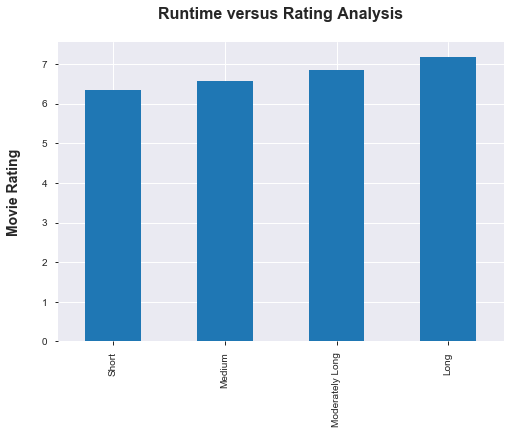

In [42]:
#print(movies.runtime_bin.value_counts())
#print(movies.groupby('runtime_bin')['rating'].mean())
movies.groupby('runtime_bin')['rating'].mean().plot.bar()
plt.ylabel('Movie Rating\n', weight='bold', fontsize=14 )
plt.xlabel('')
plt.title('Runtime versus Rating Analysis\n', fontsize=16, weight='bold')


Text(0.5, 1.02, 'Movies Count for each Runtime level')

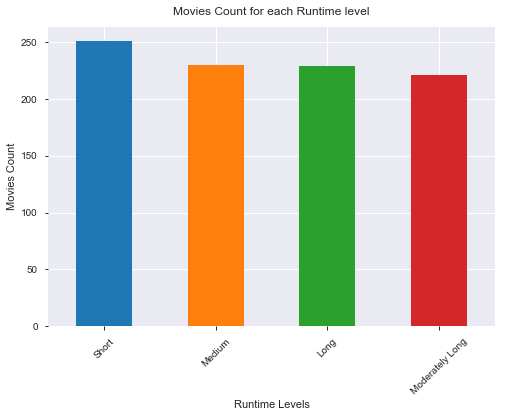

In [43]:
# Plot the count of different Runtime levels
ax = movies.runtime_bin.value_counts().plot.bar(color = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'));
ax.set_ylabel('Movies Count');
ax.set_xlabel('Runtime Levels')
ax.set_xticklabels(movies.runtime_bin.value_counts().index, rotation = 45);
ax.set_title('Movies Count for each Runtime level', y=1.02)

### Observation
Majority of the films that have good rating (>6) have a runtime between 80 - 120 minutes.

In [52]:
# Find out the Runtime level that receives the highest mean Revenue, mean Rating and mean Metascore
runtime_stats = movies.groupby('runtime_bin')['revenue', 'rating', 'metascore','votes'].mean()
runtime_stats

,revenue,rating,metascore,votes
runtime_bin,,,,
Short,56.477197,6.334263,56.430279,103161.302789
Medium,67.460803,6.579130,55.273913,134021.352174
Moderately Long,66.293772,6.848869,59.276018,179916.773756
Long,134.568687,7.186026,64.864629,289338.558952


<a id=section607></a>

### 6.2.1 Which runtime bin gives higher Rating and votes for a movie?

Text(1.0, 1.0, 'Runtime Length impacts on Revenue,Rating,Metascore,Votes                                                              \n\n')

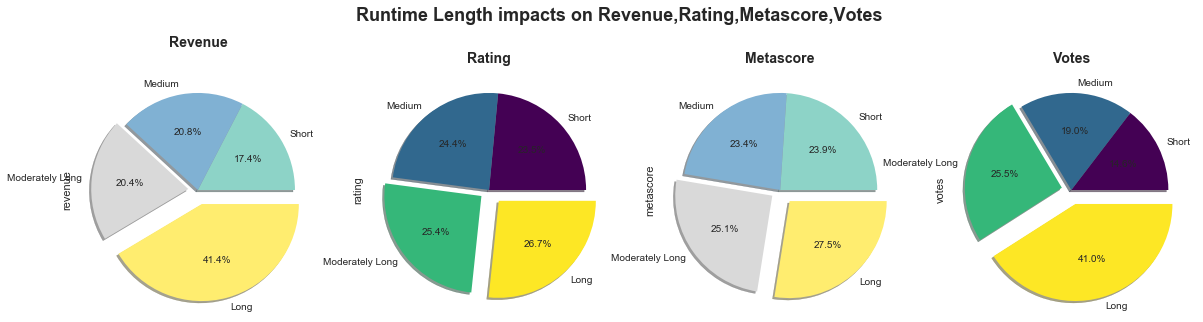

In [53]:
f,ax = plt.subplots(1,4,figsize=(20,7))

movies.groupby('runtime_bin')['revenue'].mean().plot.pie(explode=[0,0,0.1,0.15],autopct='%1.1f%%',ax=ax[0],shadow=True,cmap='Set3')
movies.groupby('runtime_bin')['rating'].mean().plot.pie(explode=[0,0,0.1,0.15],autopct='%1.1f%%',ax=ax[1],shadow=True,cmap='viridis')
movies.groupby('runtime_bin')['metascore'].mean().plot.pie(explode=[0,0,0.1,0.15],autopct='%1.1f%%',ax=ax[2],shadow=True,cmap='Set3')
movies.groupby('runtime_bin')['votes'].mean().plot.pie(explode=[0,0,0.1,0.15],autopct='%1.1f%%',ax=ax[3],shadow=True,cmap='viridis')
plt.title('\nGenre Combination Count Vs Revenue,Rating,Metascore,Votes\n',fontsize=18,fontweight="bold")

ax[0].set_title('\nRevenue\n',fontsize=14,fontweight="bold")
ax[1].set_title('\nRating',fontsize=14,fontweight="bold")
ax[2].set_title('\nMetascore',fontsize=14,fontweight="bold")
ax[3].set_title('\nVotes',fontsize=14,fontweight="bold")
plt.title('Runtime Length impacts on Revenue,Rating,Metascore,Votes                                                              \n\n'
          ,fontsize=18,fontweight="bold",loc='right')


### Observations
__1__. It was observed that movies having Long Runtimes gets higher Revenue also they are more popular.

__2__. As the Runtime increases do not have much impacts on Metascore and user Ratings.


<a id=section608></a>

## 6.3 How does combination of Genres affects the movie stats?

In [54]:
# The Genre column contains Genre combination as string separated by comma
movies['genre_count'] = movies.genre.str.split(',').str.len()
movies.genre_count.head()
# Calculate the Average Revenue, Rating and Metascore of movies based on the Genre_count
genre_count_stats = movies.groupby('genre_count')['revenue', 'rating', 'metascore','votes'].mean()
genre_count_stats

,revenue,rating,metascore,votes
genre_count,,,,
1,41.346261,6.365217,58.793478,89703.423913
2,55.335233,6.695455,58.677273,143720.963636
3,95.174403,6.794712,59.121795,199008.967949


<a id=section609></a>

### 6.3.1 Genres count that brings higher Revenue, Rating and Critical Acclaim for a movie?

Text(1.0, 1.0, 'Count of Genre Combination   Vs    Revenue,Rating,Metascore,Votes                                                              \n\n\n')

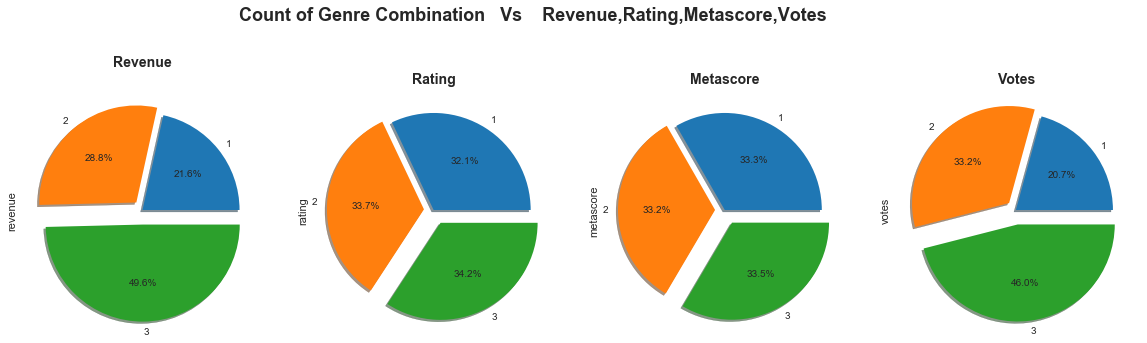

In [55]:
f,ax = plt.subplots(1,4,figsize=(20,7))

movies.groupby('genre_count')['revenue'].mean().plot.pie(explode=[0,0.1,0.15],autopct='%1.1f%%',ax=ax[0],shadow=True)
movies.groupby('genre_count')['rating'].mean().plot.pie(explode=[0,0.1,0.15],autopct='%1.1f%%',ax=ax[1],shadow=True)
movies.groupby('genre_count')['metascore'].mean().plot.pie(explode=[0,0.1,0.15],autopct='%1.1f%%',ax=ax[2],shadow=True)
movies.groupby('genre_count')['votes'].mean().plot.pie(explode=[0,0.1,0.15],autopct='%1.1f%%',ax=ax[3],shadow=True)
plt.title('\nGenre Combination Count Vs Revenue,Rating,Metascore,Votes\n',fontsize=18,fontweight="bold")

ax[0].set_title('\nRevenue\n',fontsize=14,fontweight="bold")
ax[1].set_title('\nRating',fontsize=14,fontweight="bold")
ax[2].set_title('\nMetascore',fontsize=14,fontweight="bold")
ax[3].set_title('\nVotes',fontsize=14,fontweight="bold")
plt.title('Count of ''Genre Combination''   Vs    Revenue,Rating,Metascore,Votes                                                              \n\n\n'
          ,fontsize=18,fontweight="bold",loc='right')


### Observations

__1__. As the Genre count increases in a movie, its Revenue, and votes are on the rise.

__2__. Seen from plots that a movie with 3 Genres tends to earn almost double the revenue than a movie with only one Genre.

__3__. The number of Genres in a movie does not much impact Rating and Metascore. But there is a rise in the Rating and Metascore is seen Genre count increases.

__4__. As the genre count is impacting the revenue and votes, the number of Genres do have an overall impact on a viewer. Thus viewers have more tendancy of likeness of movies with multiple category or combinations of categories in a movie rather than one single single category.

__5__. Ratings and Metascore given by Users and Metacritics, do not have much impact on the combination of Genres. Thus users and critics do not judge movies on the cobminations of Genres movie made with. 

<a id=section610></a>

### 6.3.2 What are the Genre Combinations that bring higher Revenue, Votes for a movie?

genre
Action,Adventure,Sci-Fi       50
Comedy,Drama,Romance          32
Animation,Adventure,Comedy    26
Action,Adventure,Fantasy      26
Crime,Drama,Mystery           22
Name: rank, dtype: int64


Text(0.5, 1.0, 'Movies Count for Genre Combinations\n\n')

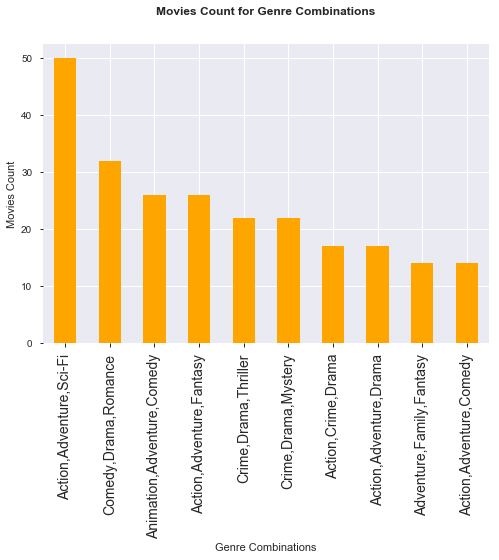

In [56]:
print ( (movies[movies.genre_count == 3]).groupby('genre')['rank'].count().sort_values(ascending=False).head() )
mv_3=(movies[movies.genre_count == 3])


ax=mv_3.genre.value_counts()[:10].plot.bar(color = 'orange');
ax.set_ylabel('Movies Count');
ax.set_xlabel('Genre Combinations')
ax.set_xticklabels(mv_3.genre.value_counts()[:10].index, rotation = 90,fontsize=14);
ax.set_title('Movies Count for Genre Combinations\n\n',weight='bold')



Text(1.0, 1.0, 'Genre Combinations   Vs   Revenue,Metascore,Votes                                                              \n\n')

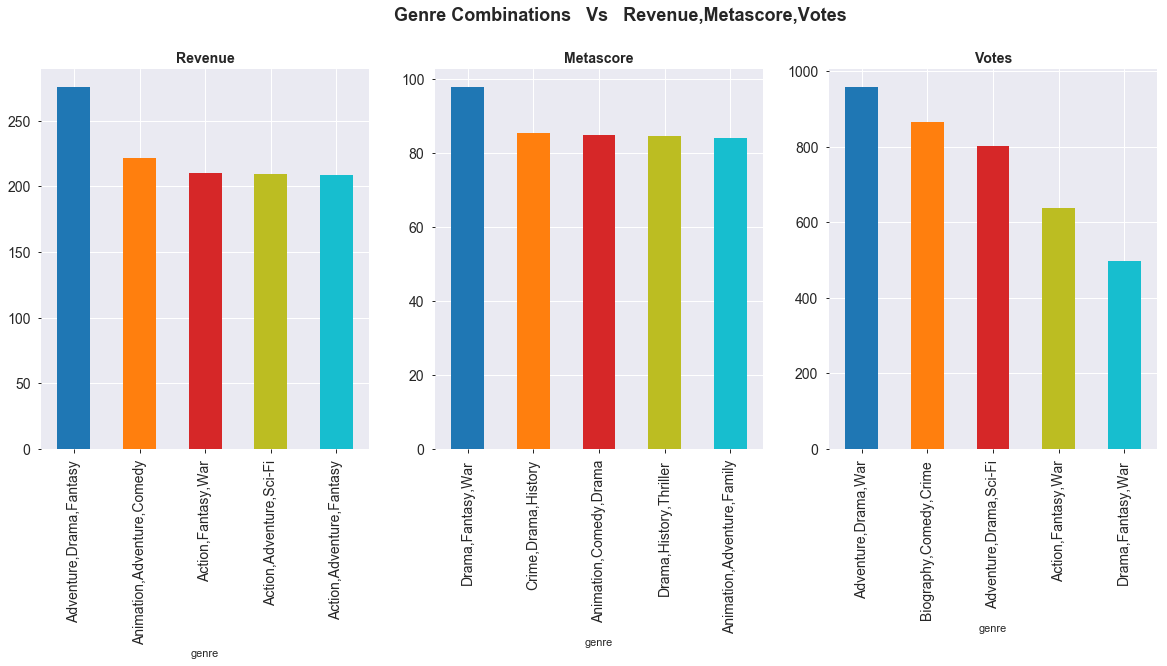

In [57]:
f,ax = plt.subplots(1,3,figsize=(20,7))

(movies[movies.genre_count == 3]).groupby('genre')['revenue'].mean().sort_values(ascending=False).head(5).plot.bar(
    color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'),ax=ax[0],fontsize=14);
(movies[movies.genre_count == 3]).groupby('genre')['metascore'].mean().sort_values(ascending=False).head(5).plot.bar(
    color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'),ax=ax[1],fontsize=14);
((movies[movies.genre_count == 3]).groupby('genre')['votes'].mean().sort_values(ascending=False).head(5)*0.001).plot.bar(
    color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'),ax=ax[2],fontsize=14);

ax[0].set_title('\nRevenue',fontsize=14,fontweight="bold")
ax[1].set_title('\nMetascore',fontsize=14,fontweight="bold")
ax[2].set_title('\nVotes',fontsize=14,fontweight="bold")

plt.title('Genre Combinations   Vs   Revenue,Metascore,Votes                                                              \n\n'
          ,fontsize=18,fontweight="bold",loc='right')


### Observations

__1__. It is observed that the Genre combination of "Adventure,Drama,Fantasy" earning the highest Revenue.The most voted Genre Combination is 'Adventure,Drama,War". Also the combination of genre 'Drama,Fantasy,war' has got most metascore.

__2__. The movies with highest revenue, votes or rating have combination of genre which included  Drama as one of the category


.




<a id=section611></a>

## 6.3.3 Which segregated Genre gets good movie?

Text(0.5, 1.0, 'score_share')

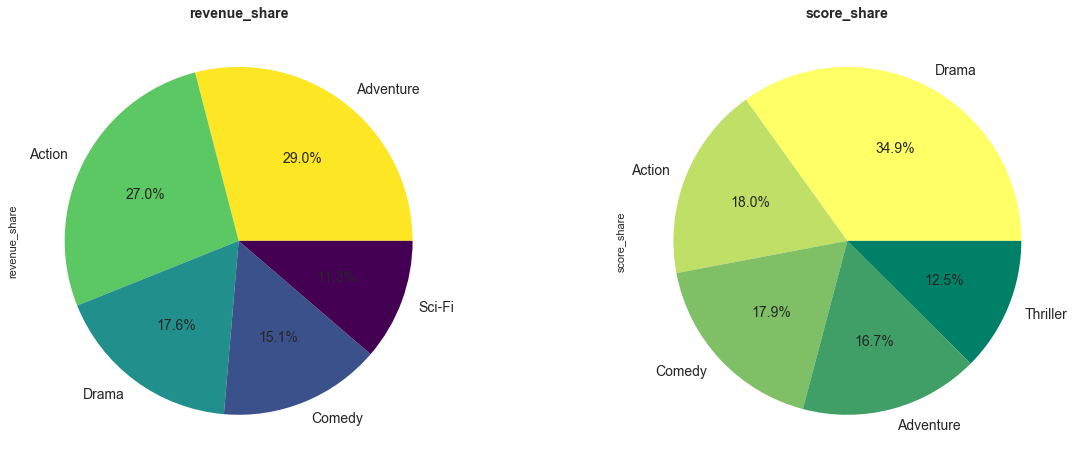

In [58]:
f,ax = plt.subplots(1,2,figsize=(20,8)) #revenue_share 	score_share 	ratings_share 	votes_share
genall.sort_values(by='revenue_share', ascending=False).head(5).plot.pie(y='revenue_share',legend = False,
                                                                         labels=genall.sort_values(by='revenue_share', ascending=False).head(5)['genre'],
                                                                         autopct='%1.1f%%',ax=ax[0],fontsize=14,cmap='viridis_r')
genall.sort_values(by='score_share', ascending=False).head(5).plot.pie(y='score_share',legend = False,
                                                                           labels=genall.sort_values(by='score_share', ascending=False).head(5)['genre'],
                                                                       autopct='%1.1f%%',ax=ax[1],fontsize=14,cmap='summer_r')
ax[0].set_title('revenue_share',fontsize=14,weight='bold')
ax[1].set_title('score_share',fontsize=14,weight='bold')



Text(0.5, 1.0, 'votes_share')

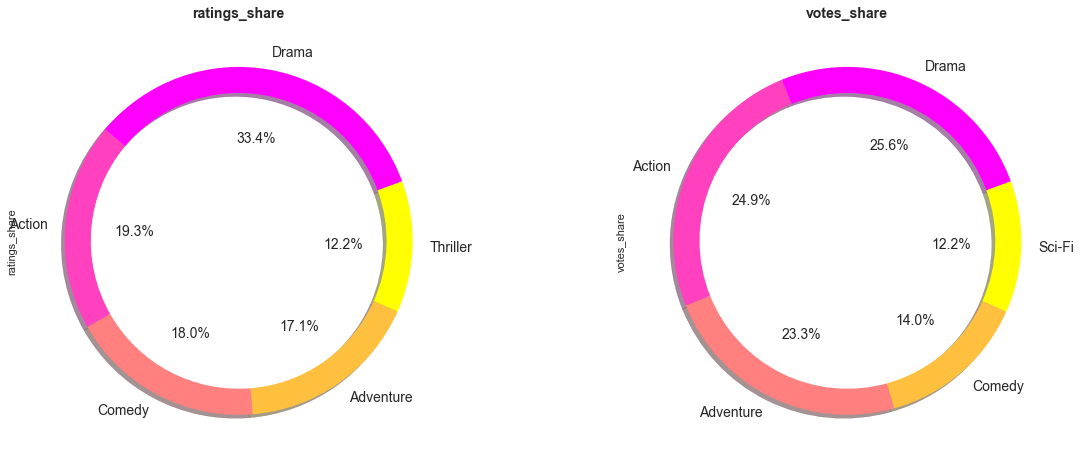

In [59]:
f,ax = plt.subplots(1,2,figsize=(20,8)) #revenue_share 	score_share 	ratings_share 	votes_share

genall.sort_values(by='ratings_share', ascending=False)['ratings_share'].head(5).plot(kind='pie', 
                            labels=genall.sort_values(by='ratings_share', ascending=False).head(5)['genre'],
                            autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                              fontsize=14,startangle=20, shadow=True, cmap='spring',ax=ax[0])
genall.sort_values(by='votes_share', ascending=False)['votes_share'].head(5).plot(kind='pie', 
                            labels=genall.sort_values(by='votes_share', ascending=False).head(5)['genre'],
                            autopct='%1.1f%%', wedgeprops=dict(width=0.15), 
                             fontsize=14,startangle=20, shadow=True, cmap='spring',ax=ax[1])



ax[0].set_title('ratings_share',fontsize=14,weight='bold')
ax[1].set_title('votes_share',fontsize=14,weight='bold')

                             

__1__.  Highest number of movies was made in the Drama genre followed by action and comedy. 

__2__.	Movies taken in Action genre were successful in all the three categories - rating, votes and revenue.

__3__. **Adventure** and **Action** movies are having a good market at the box office which is followed by movies having Drama genre. Also movies made in **Drama** genre have **highest voting,rating and metascore** received.

__4__. The least profit movies are with genres are **Musical, Western and War**. As the number of movies made in these genres are less about < 10, so obviously their collections are also low.


<a id=section612></a>

## 6.4 Which Directors have given good movies?

In [46]:
unique_directors = movies.director.unique()
director_RevenueCount = np.zeros(len(list(unique_directors)))
director_RatingCount = np.zeros(len(list(unique_directors)))
director_VotesCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_RevenueCount[i] = movies[current_director].xs('revenue', axis=1).mean() 
    director_RatingCount[i]  = movies[current_director].xs('rating', axis=1).mean() 
    director_VotesCount[i]   = movies[current_director].xs('votes', axis=1).mean() 
    i += 1
director_revenue_df = pd.DataFrame(director_RevenueCount, index=unique_directors, columns=['revenue'])
#director_revenue_df = director_revenue_df.apply(lambda x: x / movies.director.value_counts())
director_rating_df  = pd.DataFrame(director_RatingCount, index=unique_directors, columns=['rating'])
#director_rating_df =  director_rating_df.apply(lambda x: x / movies.director.value_counts()) 
director_votes_df  =  pd.DataFrame(director_VotesCount, index=unique_directors, columns=['votes'])


Text(0.5, 1.0, 'Director Vs Votes\n')

<Figure size 2880x2880 with 0 Axes>

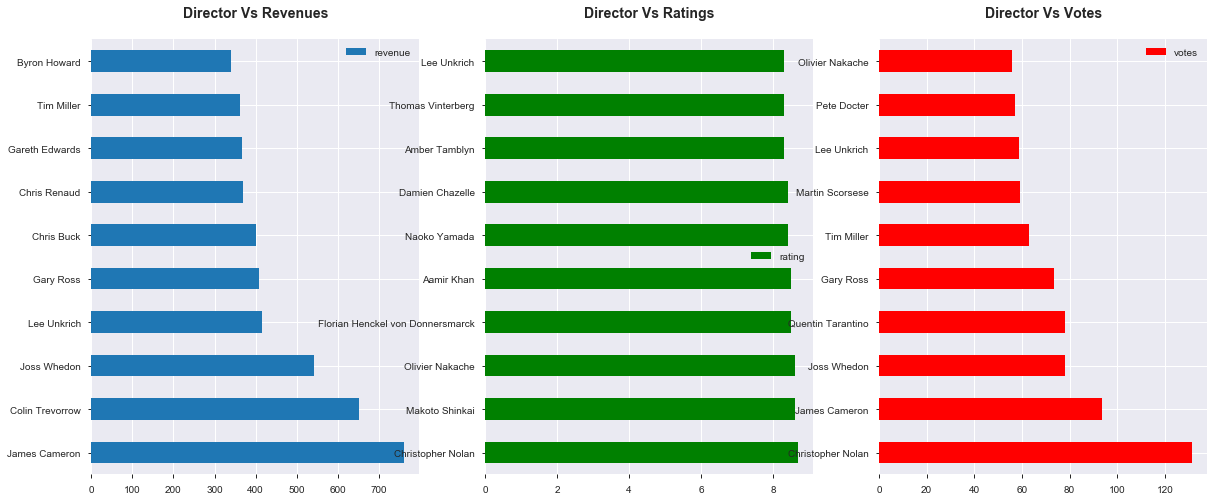

In [47]:
# plt.figure()

plt.figure(figsize=(40,40))  
f,ax = plt.subplots(1,3,figsize=(20,8)) 

director_revenue_df.sort_values(by='revenue', ascending=False).head(10).plot(kind='barh',ax=ax[0])
director_rating_df.sort_values(by='rating', ascending=False).head(10).plot(kind='barh',ax=ax[1],color='g')
(director_votes_df.sort_values(by='votes', ascending=False).head(10)/10000).plot(kind='barh',ax=ax[2],color='r')

ax[0].set_title('Director Vs Revenues\n',fontsize=14,weight='bold')
ax[1].set_title('Director Vs Ratings\n',fontsize=14,weight='bold')
ax[2].set_title('Director Vs Votes\n',fontsize=14,weight='bold')


Director with highest movie made in last 10 years is Ridley Scott, so he has good experience. 
There is no direct relation b/w directors producing more number of movies vs their revenue earnings.

James Cameron has lead to the highest revenue followed Colin Trevorrow. 
User ratings and votes score stand in equilibrium for top rated director with Christopher Nolan being most popular. Followed by James Cameron carrying good votes and popularity among audience.
Revenue collection  will need to consider the country in which the movie was released due the currency rates.

<a id=section612></a>


## Insights

__1__. The number of movies almost doubled from 2015 to 2016.

__2__.The movies are spread across 20 different Genres.
       
     * Adventure and Action movies are having a good market followed by Drama,Comedy and Sci-Fi movies.
     * Highest number of movies was made in the Drama. Also they are rated much higher compared to any other Genres.
     * Movies taken in Action genre were successful in all the three categories - rating, votes and revenue.
     * Movies having  combination of 3 genres have performed better with good Metascore and larger count of votes as well
      
__3__. Rating and Metascore are highly correlated whereas Revenue and Rating have low correlation.

__4__. Long Movie Runtimes gets higher Revenue also they are more popular.

__5__. High revenue collection movies have high ratings but the vice-versa is not true. That is highly rated or critic acclaimed movies failed to collect money.

__6__. The person to direct more number of movies in this period is "Ridley Scott" but the one to understand the pulse of the audience is " Christopher Nolan " and with highest collection taken by “James Cameron”.



### Conclusions!

Though the movies production has increased significantly over the years, the revenue, and ratings has not increased but are in downfall.
Quality of movies rather should be focused more than the count in order to make market credibility and audience confidence

User rating and critic’s score stand in equilibrium for top rated directors. Hence User votes and ratings should be studied thoroughly.

Action, Sci-Fi & Drama have been liked by audience more than any other genre
A combination of 3 genres attracts larger audience thereby create more revenues.
It will be best to pick the combo of successful few genres like , Drama, Action, Adventure, Sci-fi. 

Top directors with proven track record should be considered for any successful movie production.

Runtime Duration of movie should be maintained >2 hrs. for better results and audience appeal.